**Import libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt    
import plotly.express as px
%matplotlib inline   

**Load dataset**

In [2]:
df = pd.read_csv("PEA18.csv")

## Exploratory data analysis

Displaying first 5 observations of the dataset.

In [3]:
df.head()

,STATISTIC Label,Year,Country,Sex,Origin or Destination,UNIT,VALUE
0,Estimated Migration (Persons in April),1987,United Kingdom (1),Both sexes,Net migration,Thousand,-13.7
1,Estimated Migration (Persons in April),1987,United Kingdom (1),Both sexes,Emigrants: All destinations,Thousand,21.8
2,Estimated Migration (Persons in April),1987,United Kingdom (1),Both sexes,Immigrants: All origins,Thousand,8.1
3,Estimated Migration (Persons in April),1987,United Kingdom (1),Male,Net migration,Thousand,-9.0
4,Estimated Migration (Persons in April),1987,United Kingdom (1),Male,Emigrants: All destinations,Thousand,13.1


Displaying the bottom 5 rows 

In [4]:
df.tail()

,STATISTIC Label,Year,Country,Sex,Origin or Destination,UNIT,VALUE
2659,Estimated Migration (Persons in April),2023,EU15 to EU27 (accession countries joined post ...,Male,Emigrants: All destinations,Thousand,3.6
2660,Estimated Migration (Persons in April),2023,EU15 to EU27 (accession countries joined post ...,Male,Immigrants: All origins,Thousand,3.9
2661,Estimated Migration (Persons in April),2023,EU15 to EU27 (accession countries joined post ...,Female,Net migration,Thousand,-0.2
2662,Estimated Migration (Persons in April),2023,EU15 to EU27 (accession countries joined post ...,Female,Emigrants: All destinations,Thousand,5.2
2663,Estimated Migration (Persons in April),2023,EU15 to EU27 (accession countries joined post ...,Female,Immigrants: All origins,Thousand,5.0


Displaying number of features and observations of the dataset.

In [5]:
df.shape

(2664, 7)

Data types of features in dataset.

In [6]:
df.dtypes

STATISTIC Label           object
Year                       int64
Country                   object
Sex                       object
Origin or Destination     object
UNIT                      object
VALUE                    float64
dtype: object

Displaying descriptive statistics

In [7]:
df.describe()

,Year,VALUE
count,2664.000000,2104.000000
mean,2005.000000,8.943726
std,10.679083,15.513703
min,1987.000000,-43.900000
25%,1996.000000,1.800000
50%,2005.000000,4.700000
75%,2014.000000,10.200000
max,2023.000000,151.100000


Checking for duplicate values.

In [8]:
df.duplicated().sum()

0

Counting available observations per feature.

In [9]:
df.count()

STATISTIC Label          2664
Year                     2664
Country                  2664
Sex                      2664
Origin or Destination    2664
UNIT                     2664
VALUE                    2104
dtype: int64

Dropping irrelevant columns

In [10]:
df = df.drop(["STATISTIC Label","UNIT"], axis=1) 
df.head(5) 

,Year,Country,Sex,Origin or Destination,VALUE
0,1987,United Kingdom (1),Both sexes,Net migration,-13.7
1,1987,United Kingdom (1),Both sexes,Emigrants: All destinations,21.8
2,1987,United Kingdom (1),Both sexes,Immigrants: All origins,8.1
3,1987,United Kingdom (1),Male,Net migration,-9.0
4,1987,United Kingdom (1),Male,Emigrants: All destinations,13.1


Listing the countries 

In [11]:
unique_countries = df['Country'].unique()
print(unique_countries)

['United Kingdom (1)' 'United States' 'Canada' 'Australia'
 'Other countries (23)' 'All countries' 'EU14 excl Irl (UK & Ireland)'
 'EU15 to EU27 (accession countries joined post 2004)']


EU15 to EU27 after the 2004 enlargement. The accession countries that joined post-2004 are Bulgaria and Romania


In [12]:
unique_sex = df['Sex'].unique()
print(unique_sex)

['Both sexes' 'Male' 'Female']


In [13]:
female_immigrants = df[(df['Sex'] == 'Female') & (df['Origin or Destination'] == 'Immigrants: All origins')]
count_female_immigrants = len(female_immigrants)
print(f"The number of female immigrants is: {count_female_immigrants}")

The number of female immigrants is: 296


Checking for missing values

In [14]:
df.isnull().sum()

Year                       0
Country                    0
Sex                        0
Origin or Destination      0
VALUE                    560
dtype: int64

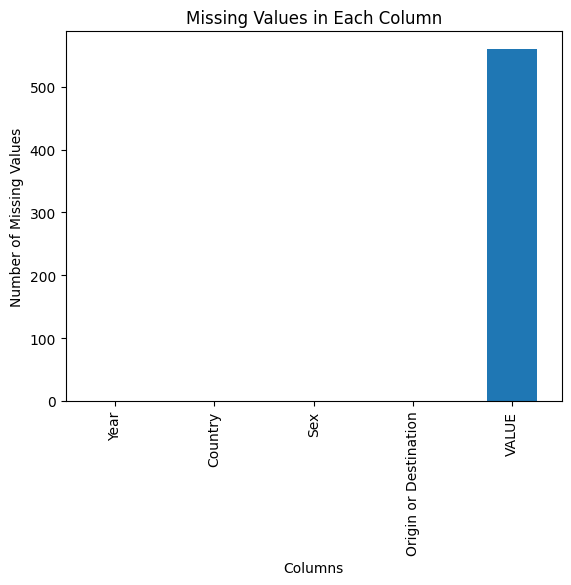

In [15]:
missing_values = df.isnull().sum()
missing_values.plot(kind='bar')
plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()


Imputing the missing values with mean **check** 

In [16]:
# Simple imputation with mean
df['VALUE'].fillna(df['VALUE'].mean(), inplace=True)  # You can also use median instead of mean

# Check for missing values after imputation
missing_values_after_imputation = df.isnull().sum()
print("\nMissing values after imputation:")
print(missing_values_after_imputation)

# Save the imputed dataset
df.to_csv('imputed_dataset.csv', index=False)


Missing values after imputation:
Year                     0
Country                  0
Sex                      0
Origin or Destination    0
VALUE                    0
dtype: int64


In [17]:
df.count()

Year                     2664
Country                  2664
Sex                      2664
Origin or Destination    2664
VALUE                    2664
dtype: int64

Detecting Outliers


<Axes: xlabel='Year'>

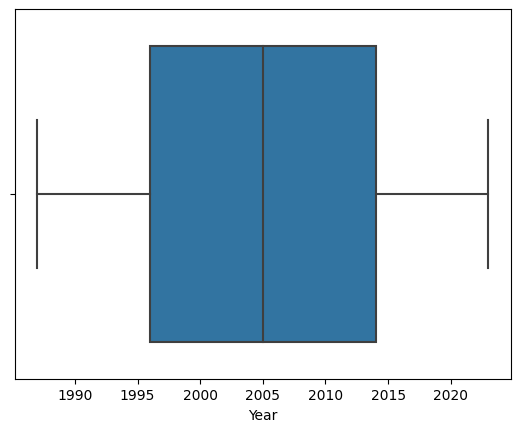

In [18]:
sns.boxplot(x=df["Year"]) 


<Axes: xlabel='VALUE'>

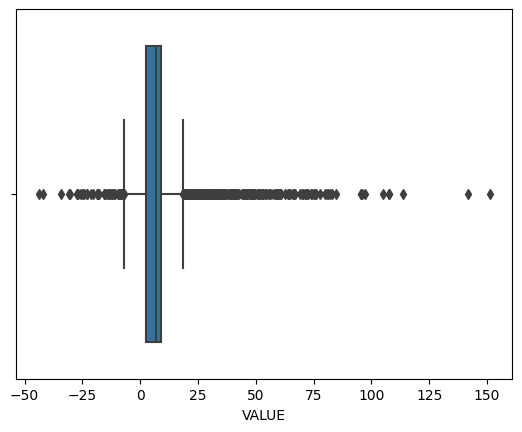

In [19]:
sns.boxplot(x=df["VALUE"]) 

In [20]:
df.info

<bound method DataFrame.info of       Year                                            Country         Sex  \
0     1987                                 United Kingdom (1)  Both sexes   
1     1987                                 United Kingdom (1)  Both sexes   
2     1987                                 United Kingdom (1)  Both sexes   
3     1987                                 United Kingdom (1)        Male   
4     1987                                 United Kingdom (1)        Male   
...    ...                                                ...         ...   
2659  2023  EU15 to EU27 (accession countries joined post ...        Male   
2660  2023  EU15 to EU27 (accession countries joined post ...        Male   
2661  2023  EU15 to EU27 (accession countries joined post ...      Female   
2662  2023  EU15 to EU27 (accession countries joined post ...      Female   
2663  2023  EU15 to EU27 (accession countries joined post ...      Female   

            Origin or Destination  VALUE  


In [21]:
df['Origin or Destination'] = df['Origin or Destination'].str.replace('Emigrants: All destinations', 'Emigrants')
df['Origin or Destination'] = df['Origin or Destination'].str.replace('Immigrants: All origins', 'Immigrants')


In [22]:
df['Origin or Destination'].is_unique

False

In [23]:
df.dtypes.value_counts()

object     3
int64      1
float64    1
Name: count, dtype: int64

Fixing the strings

In [24]:
# Example list of strings
countries = ['United Kingdom (1)', 'United States', 'Canada', 'Australia',
             'Other countries (23)', 'All countries', 'EU14 excl Irl (UK & Ireland)',
             'EU15 to EU27 (accession countries joined post 2004)']

# Apply string operations to the list
processed_countries = [country.split('(')[0].strip() if '(' in country else country for country in countries]

# Print the processed list
print(processed_countries)

['United Kingdom', 'United States', 'Canada', 'Australia', 'Other countries', 'All countries', 'EU14 excl Irl', 'EU15 to EU27']


In [25]:
def clean_country_name(country):
    return country.split('(')[0].strip()

# Apply the function to the 'Country' column
df['Country'] =df['Country'].apply(clean_country_name)

# Print the updated dataset
print(df)

      Year         Country         Sex Origin or Destination  VALUE
0     1987  United Kingdom  Both sexes         Net migration  -13.7
1     1987  United Kingdom  Both sexes             Emigrants   21.8
2     1987  United Kingdom  Both sexes            Immigrants    8.1
3     1987  United Kingdom        Male         Net migration   -9.0
4     1987  United Kingdom        Male             Emigrants   13.1
...    ...             ...         ...                   ...    ...
2659  2023    EU15 to EU27        Male             Emigrants    3.6
2660  2023    EU15 to EU27        Male            Immigrants    3.9
2661  2023    EU15 to EU27      Female         Net migration   -0.2
2662  2023    EU15 to EU27      Female             Emigrants    5.2
2663  2023    EU15 to EU27      Female            Immigrants    5.0

[2664 rows x 5 columns]


Renaming columns for better visibility

In [26]:
df = df.rename(columns={'Origin or Destination': 'Migration', 'VALUE': 'Value'})

Categorical Data: Country, sex and Migration. 

In [27]:
df.head(10)

,Year,Country,Sex,Migration,Value
0,1987,United Kingdom,Both sexes,Net migration,-13.7
1,1987,United Kingdom,Both sexes,Emigrants,21.8
2,1987,United Kingdom,Both sexes,Immigrants,8.1
3,1987,United Kingdom,Male,Net migration,-9.0
4,1987,United Kingdom,Male,Emigrants,13.1
5,1987,United Kingdom,Male,Immigrants,4.1
6,1987,United Kingdom,Female,Net migration,-4.7
7,1987,United Kingdom,Female,Emigrants,8.7
8,1987,United Kingdom,Female,Immigrants,4.0
9,1987,United States,Both sexes,Net migration,-6.9


## Statistical analysis

Descriptive statistic

In [28]:
df.describe()

,Year,Value
count,2664.000000,2664.000000
mean,2005.000000,8.943726
std,10.679083,13.786357
min,1987.000000,-43.900000
25%,1996.000000,2.500000
50%,2005.000000,6.700000
75%,2014.000000,8.943726
max,2023.000000,151.100000


Year:

The dataset spans the years 1987 to 2023.
The mean year is 2005, indicating a relatively even distribution of data across the years.
The standard deviation of 10.68 suggests that the data points are relatively spread out around the mean year.
Value:

The 'Value' column represents some numerical measurements, with a mean value of approximately 8.94.
The standard deviation of 13.79 indicates a significant amount of variation in the values.
The minimum value of -43.9 and the maximum value of 151.1 suggest the presence of outliers, as the values are spread over a wide range.
The median value of 6.7 is lower than the mean, indicating a potential right-skewed distribution, which aligns with the presence of outliers on the higher end.

In [29]:
# Assuming 'df' is your DataFrame
object_statistics = df.describe(include='O')
print(object_statistics)


               Country         Sex      Migration
count             2664        2664           2664
unique               8           3              3
top     United Kingdom  Both sexes  Net migration
freq               333         888            888


The output shows the summary statistics for the object-type columns in your DataFrame. For the 'Country' column, there are 8 unique entries, with 'United Kingdom' being the most frequent entry (appearing 333 times). Similarly, the 'Sex' column has 3 unique entries, with 'Both sexes' being the most frequent (appearing 888 times). The 'Migration' column also has 3 unique entries, with 'Net migration' being the most frequent (appearing 888 times).

In [30]:
mean_val= df['Value'].mean()
print(mean_val)

8.943726235741446


In [31]:
trend = df["Value"].mode()
print(trend)

0    8.943726
Name: Value, dtype: float64


In [32]:
mode = df['Value'].mode()
print(mode)

0    8.943726
Name: Value, dtype: float64


Calculating the mean average of the'Value' variable indicates the average of 8.943726 for particular aspect of the migration dataset for a particular aspect of migration being measured. Since the migration of the dataset is divided by Net migration, immigrants and emigrants. It would be words to get mean of each of them.

Calculate the average of Net migration over the years for box sexes

In [33]:
net_migration_data = df[df['Migration'] == 'Net migration']
mean_net_migration = net_migration_data['Value'].mean()
print("Mean Net Migration:", mean_net_migration)

Mean Net Migration: 4.4670841468845275


Calculate the average of Inmigration

In [34]:
Immigrants_data = df[df['Migration'] == 'Immigrants']
mean_Immigrants = Immigrants_data['Value'].mean()
print("Mean Immigrants:", mean_Immigrants)

Mean Immigrants: 12.669378361250986


Calculate the average of Emigrants

In [35]:
Emigrants_data = df[df['Migration'] == 'Emigrants']
mean_Emigrants = Emigrants_data['Value'].mean()
print("Mean Emigrants:", mean_Emigrants)

Mean Emigrants: 9.694716199088822


In [36]:
value_counts = df['Migration'].value_counts()
relative_frequencies = value_counts / len(df)

In [37]:
subtable = pd.DataFrame({'Migration': value_counts.index, 
                         'Frequency': value_counts.values, 
                         'Relative Frequency': relative_frequencies.values})
subtable

,Migration,Frequency,Relative Frequency
0,Net migration,888,0.333333
1,Emigrants,888,0.333333
2,Immigrants,888,0.333333


In [38]:
df_locations = df.groupby('Migration', axis = 0).sum()
df_locations

,Year,Country,Sex,Value
Migration,,,,
Emigrants,1780440,United KingdomUnited KingdomUnited KingdomUnit...,Both sexesMaleFemaleBoth sexesMaleFemaleBoth s...,8608.907985
Immigrants,1780440,United KingdomUnited KingdomUnited KingdomUnit...,Both sexesMaleFemaleBoth sexesMaleFemaleBoth s...,11250.407985
Net migration,1780440,United KingdomUnited KingdomUnited KingdomUnit...,Both sexesMaleFemaleBoth sexesMaleFemaleBoth s...,3966.770722


Text(0.5, 1.0, 'Migration rate')

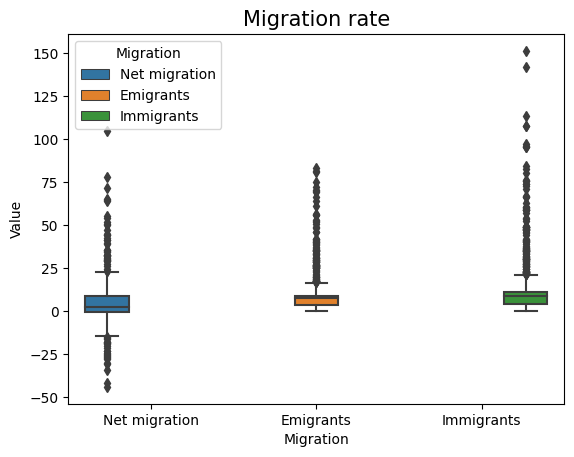

In [39]:
sns.boxplot(x = 'Migration', y ='Value', data=df, hue = 'Migration')
plt.title('Migration rate', fontsize=15)

Text(0.5, 1.0, 'Migration rate')

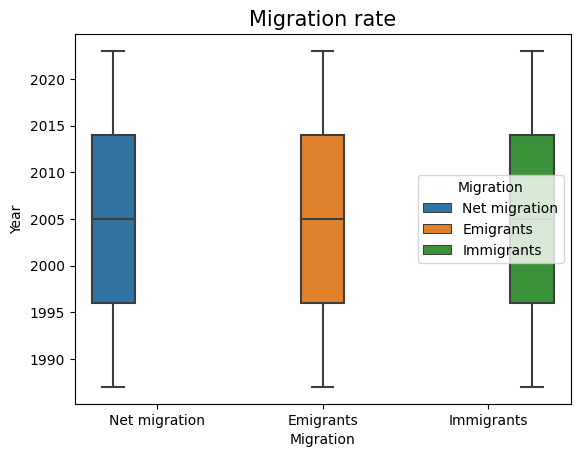

In [40]:
sns.boxplot(x = 'Migration', y ='Year', data=df, hue = 'Migration')
plt.title('Migration rate', fontsize=15)

In [41]:
df_locations.reset_index(inplace=True)

In [42]:
df_locations.columns = ['Migration','Year', 'Country', 'Sex', 'Value']

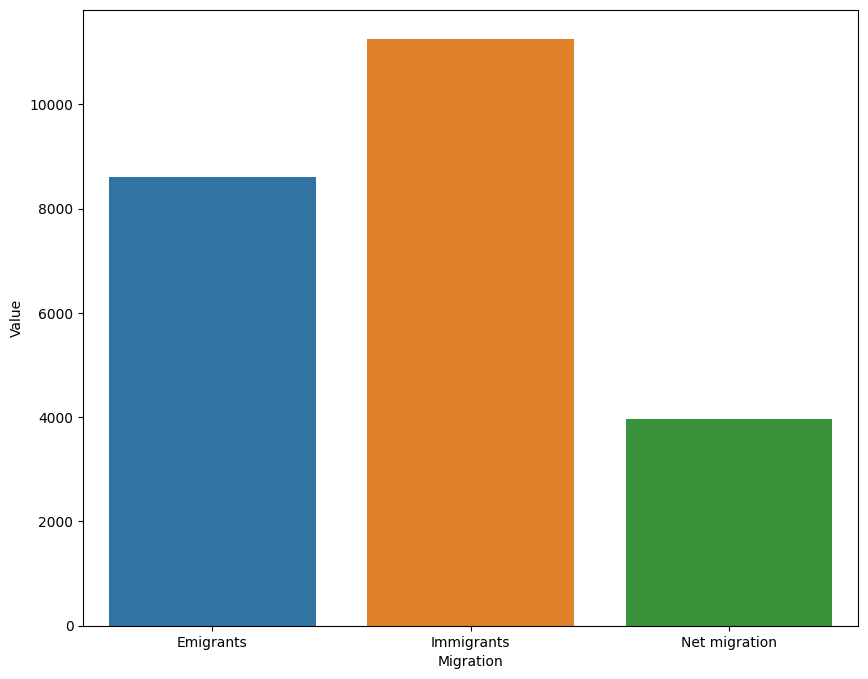

In [43]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(x="Migration", y="Value", data=df_locations)

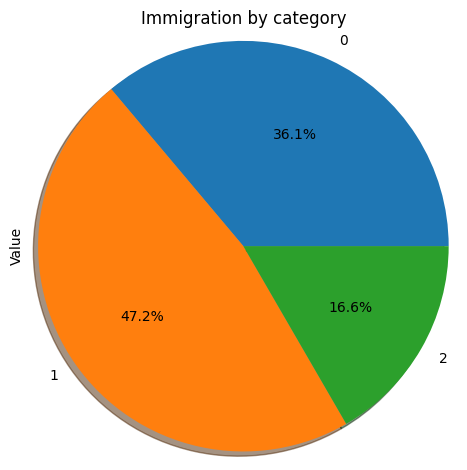

In [44]:
df_locations['Value'].plot(kind='pie', radius=1.2, autopct='%1.1f%%', shadow = True)

plt.title('Immigration by category')
plt.tight_layout()

In [45]:
df_locations = df.groupby('Country', axis = 0).sum()
df_locations

,Year,Sex,Migration,Value
Country,,,,
All countries,667665,Both sexesBoth sexesBoth sexesMaleMaleMaleFema...,Net migrationEmigrantsImmigrantsNet migrationE...,9414.974525
Australia,667665,Both sexesBoth sexesBoth sexesMaleMaleMaleFema...,Net migrationEmigrantsImmigrantsNet migrationE...,2093.964259
Canada,667665,Both sexesBoth sexesBoth sexesMaleMaleMaleFema...,Net migrationEmigrantsImmigrantsNet migrationE...,1865.464259
EU14 excl Irl,667665,Both sexesBoth sexesBoth sexesMaleMaleMaleFema...,Net migrationEmigrantsImmigrantsNet migrationE...,1469.100000
EU15 to EU27,667665,Both sexesBoth sexesBoth sexesMaleMaleMaleFema...,Net migrationEmigrantsImmigrantsNet migrationE...,2934.883650
Other countries,667665,Both sexesBoth sexesBoth sexesMaleMaleMaleFema...,Net migrationEmigrantsImmigrantsNet migrationE...,2833.400000
United Kingdom,667665,Both sexesBoth sexesBoth sexesMaleMaleMaleFema...,Net migrationEmigrantsImmigrantsNet migrationE...,2488.300000
United States,667665,Both sexesBoth sexesBoth sexesMaleMaleMaleFema...,Net migrationEmigrantsImmigrantsNet migrationE...,726.000000


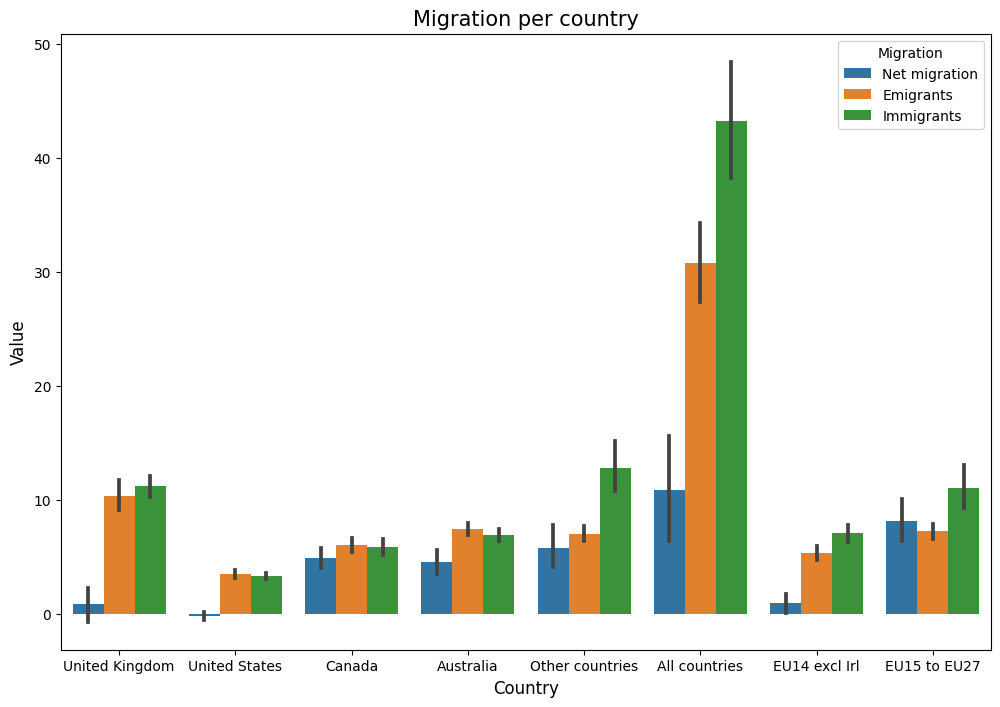

In [46]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Country', y='Value', data=df, hue='Migration')
plt.title('Migration per country', fontsize=15)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.show()


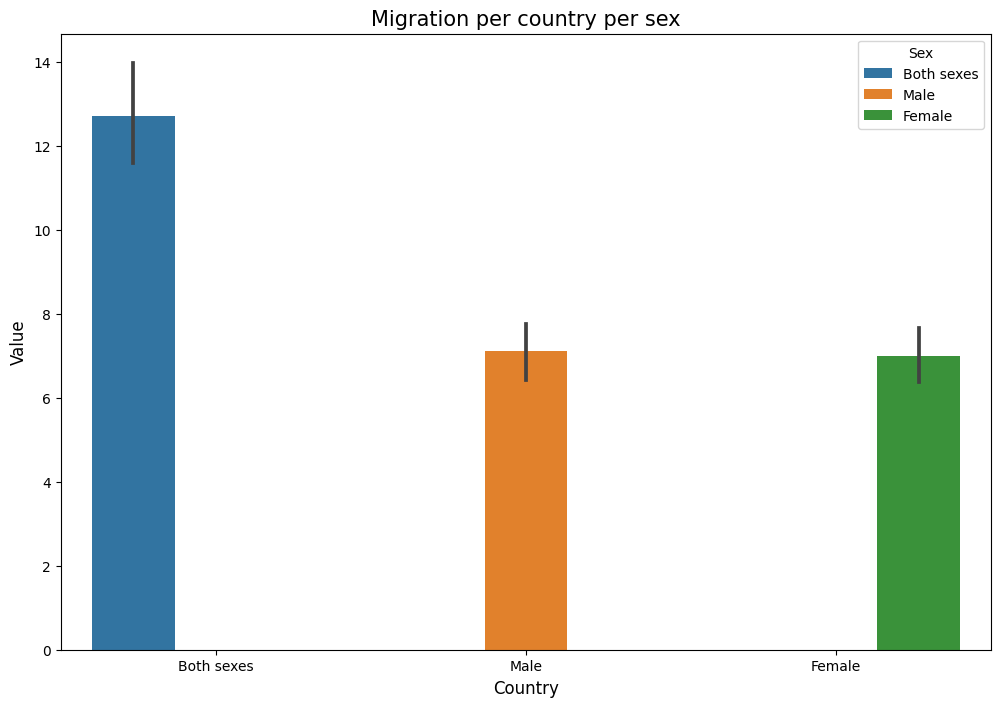

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.barplot(x='Sex', y='Value', data=df, hue='Sex')
plt.title('Migration per country per sex', fontsize=15)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.show()


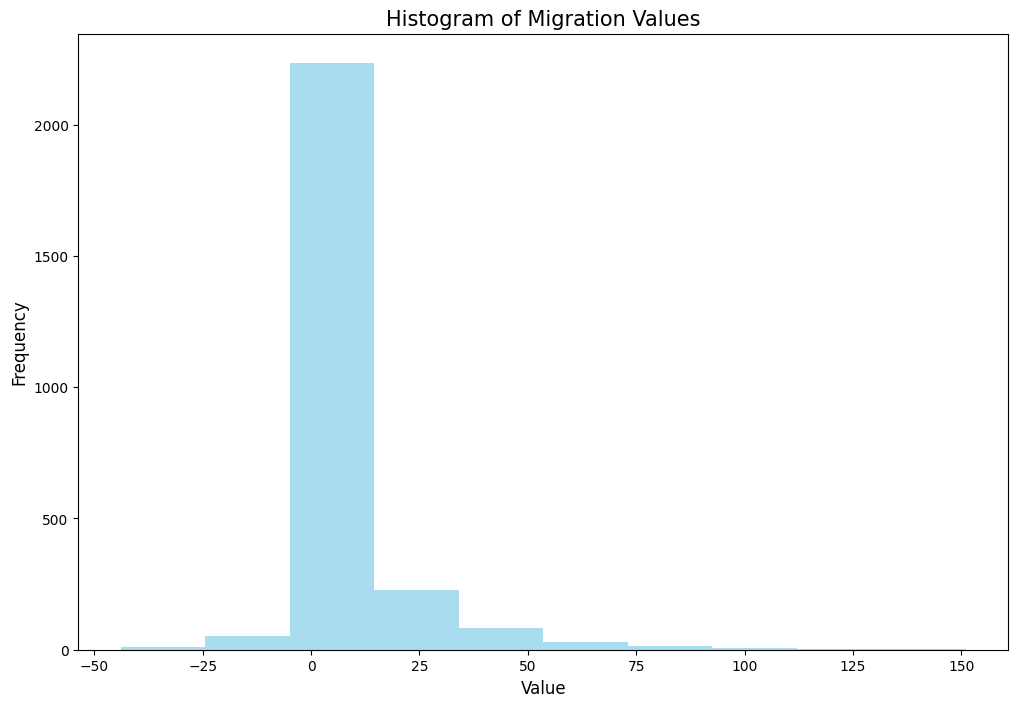

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.hist(df['Value'], bins=10, alpha=0.7, color='skyblue')
plt.title('Histogram of Migration Values', fontsize=15)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


In [49]:
migration_rate_per_year = df.groupby('Year')['Value'].sum()
print(migration_rate_per_year)


Year
1987     346.355513
1988     332.955513
1989     368.055513
1990     428.855513
1991     454.755513
1992     562.980608
1993     515.780608
1994     478.380608
1995     490.380608
1996     549.180608
1997     591.380608
1998     603.880608
1999     628.180608
2000     658.280608
2001     703.380608
2002     776.680608
2003     721.580608
2004     709.280608
2005     837.387072
2006    1023.587072
2007    1369.687072
2008     908.100000
2009     589.000000
2010     334.400000
2011     426.100000
2012     458.600000
2013     501.400000
2014     532.100000
2015     607.100000
2016     658.700000
2017     762.700000
2018     767.600000
2019     776.800000
2020     764.800000
2021     592.400000
2022     862.400000
2023    1132.900000
Name: Value, dtype: float64


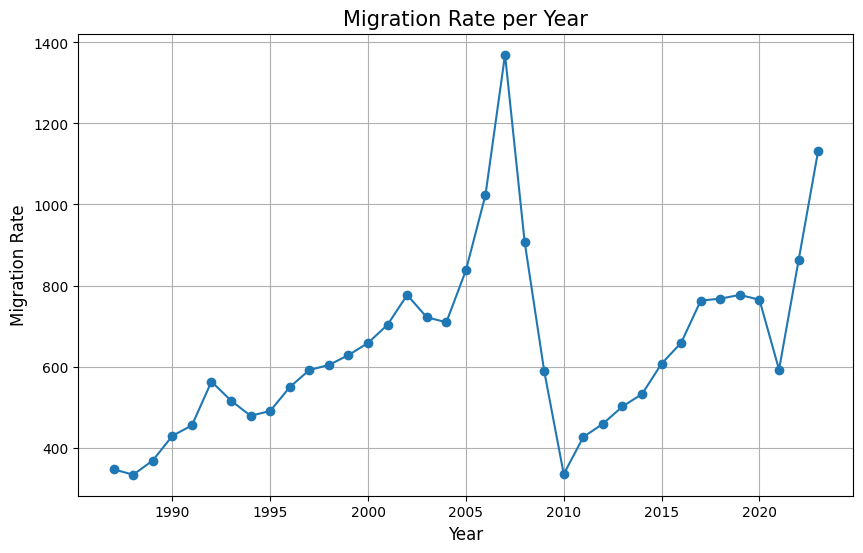

In [50]:
import matplotlib.pyplot as plt

migration_rate_per_year = df.groupby('Year')['Value'].sum()

plt.figure(figsize=(10, 6))
migration_rate_per_year.plot(kind='line', marker='o')
plt.title('Migration Rate per Year', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Migration Rate', fontsize=12)
plt.grid()
plt.show()


Migration Assumptions: Ireland’s net migration rate has been fluctuating over the years. Between 2005 and 2010, Ireland experienced a positive net migration rate, which means that more people immigrated to Ireland than emigrated from it. The exact reasons for this trend are not clear, but it could be due to a combination of factors such as the country’s economic growth, job opportunities, and quality of life.

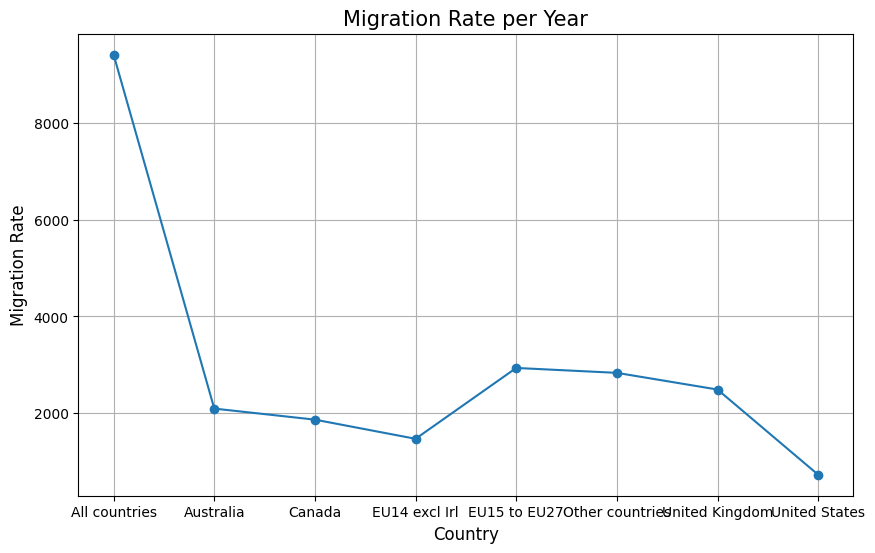

In [51]:
migration_rate_per_year = df.groupby('Country')['Value'].sum()

plt.figure(figsize=(10, 6))
migration_rate_per_year.plot(kind='line', marker='o')
plt.title('Migration Rate per Year', fontsize=15)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Migration Rate', fontsize=12)
plt.grid()
plt.show()

In [52]:
immigration_per_year = df[df['Migration'] == 'Immigrants'].groupby('Year')['Value'].sum()
migration_per_year = df[df['Migration'] == 'Emigrants'].groupby('Year')['Value'].sum()

print("Immigration per year:")
print(immigration_per_year)

print("Emigrants per year:")
print(migration_per_year)


Immigration per year:
Year
1987    150.080989
1988    156.080989
1989    178.380989
1990    198.380989
1991    198.280989
1992    243.393536
1993    219.493536
1994    200.893536
1995    205.393536
1996    237.193536
1997    258.593536
1998    264.293536
1999    276.093536
2000    290.793536
2001    316.893536
2002    348.093536
2003    320.693536
2004    314.393536
2005    391.962357
2006    484.962357
2007    658.062357
2008    454.000000
2009    294.700000
2010    167.300000
2011    213.200000
2012    229.000000
2013    250.700000
2014    266.300000
2015    303.600000
2016    329.400000
2017    381.400000
2018    383.800000
2019    388.400000
2020    382.400000
2021    296.200000
2022    431.200000
2023    566.400000
Name: Value, dtype: float64
Emigrants per year:
Year
1987    219.080989
1988    281.880989
1989    309.980989
1990    267.080989
1991    204.380989
1992    213.993536
1993    220.993536
1994    219.793536
1995    212.993536
1996    205.193536
1997    181.893536
1998    

In [53]:
df.dtypes

Year           int64
Country       object
Sex           object
Migration     object
Value        float64
dtype: object

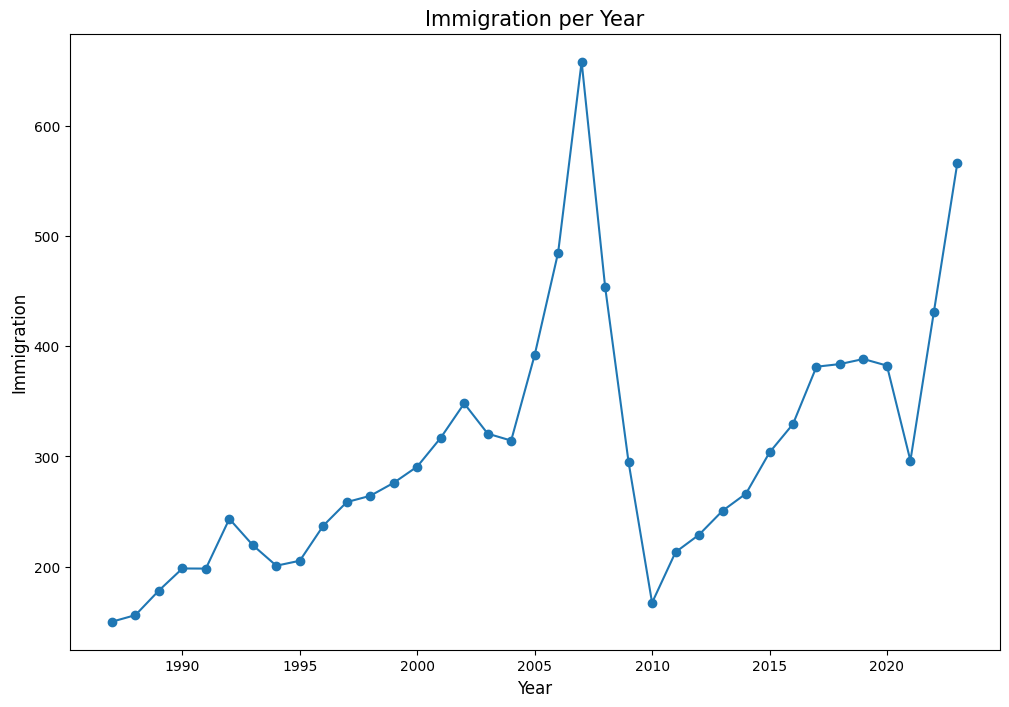

In [54]:
import numpy as np
import matplotlib.pyplot as plt

immigration_per_year = df[df['Migration'] == 'Immigrants'].groupby('Year')['Value'].sum()

# Convert index and values to numpy arrays
years = np.array(immigration_per_year.index)
immigration_values = np.array(immigration_per_year.values)

# Plotting the data
plt.figure(figsize=(12, 8))
plt.plot(years, immigration_values, marker='o')
plt.title('Immigration per Year', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Immigration', fontsize=12)
plt.show()


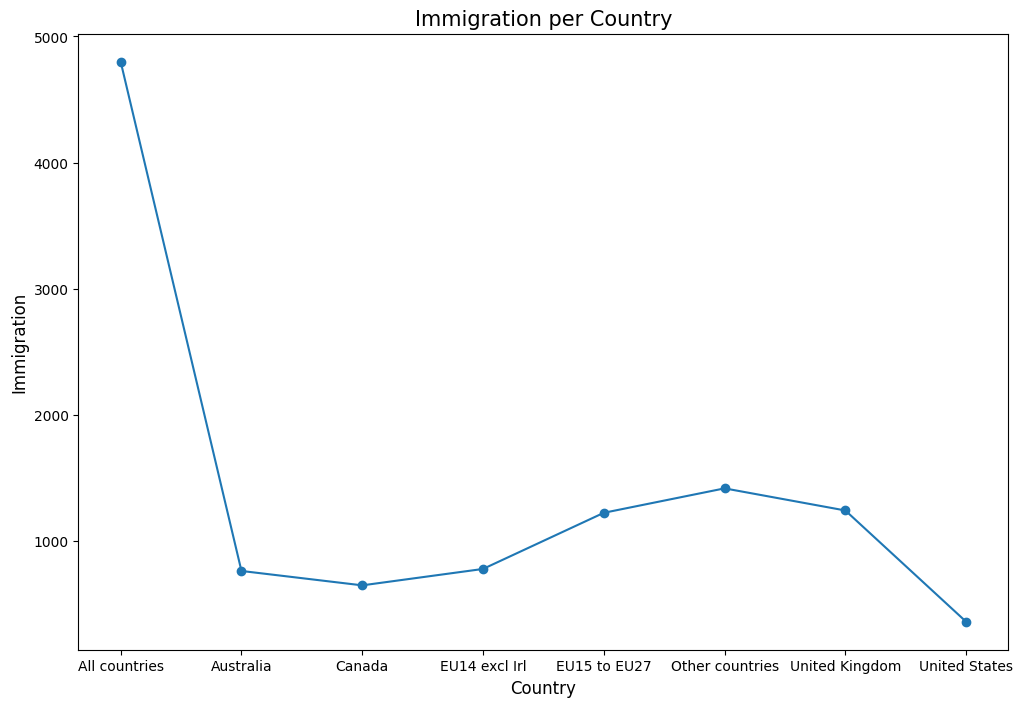

In [55]:
import numpy as np
import matplotlib.pyplot as plt

immigration_per_year = df[df['Migration'] == 'Immigrants'].groupby('Country')['Value'].sum()

# Convert index and values to numpy arrays
years = np.array(immigration_per_year.index)
immigration_values = np.array(immigration_per_year.values)

# Plotting the data
plt.figure(figsize=(12, 8))
plt.plot(years, immigration_values, marker='o')
plt.title('Immigration per Country', fontsize=15)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Immigration', fontsize=12)
plt.show()


## Discrete distribution

"Migration" - if it represents the outcome of a migration event, with 1 indicating successful migration and 0 indicating unsuccessful migration.
"Value" - if it represents the occurrence of a specific event, with 1 indicating the event occurred and 0 indicating it did not.

"Migration": Typically, migration is considered a discrete variable because it involves the movement of individuals from one location to another. The data might represent the count or frequency of migration events, making it discrete in nature.

"Value": The nature of the "Value" variable depends on its context and the specific data it represents. If the "Value" variable represents a continuous measurement, such as a numerical value indicating a quantity or magnitude, it would be considered a continuous variable. On the other hand, if "Value" represents a categorical variable with distinct categories or levels, it would be considered a discrete variable.

In [56]:
from scipy.stats import binom

In [57]:
df.head()

,Year,Country,Sex,Migration,Value
0,1987,United Kingdom,Both sexes,Net migration,-13.7
1,1987,United Kingdom,Both sexes,Emigrants,21.8
2,1987,United Kingdom,Both sexes,Immigrants,8.1
3,1987,United Kingdom,Male,Net migration,-9.0
4,1987,United Kingdom,Male,Emigrants,13.1


In [58]:
value_counts = df['Sex'].value_counts()
relative_frequencies = value_counts / len(df)

In [59]:
subtable = pd.DataFrame({'Sex': value_counts.index, 
                         'Frequency': value_counts.values, 
                         'Relative Frequency': relative_frequencies.values})
subtable

,Sex,Frequency,Relative Frequency
0,Both sexes,888,0.333333
1,Male,888,0.333333
2,Female,888,0.333333


n= total lend immigrant

p= probability of immigrant being female 

K= number of females in the dataset

N typically represents the total number of trials or occurrences. In this case, it may correspond to the total number of immigrants or the sample size.

P represents the probability of success in a single trial. Here, it would be the probability of an immigrant being female, as calculated using the formula:

probability_female_2005 = female_immigrants_2005 / total_immigrants_2005

K represents the number of successful outcomes. It can also be considered as the number of females in the dataset.

X represents the random variable that denotes the number of successful outcomes or events.


In [60]:
total_immigrants_2007 = df.loc[df['Year'] == 2007, 'Value'].sum()
female_immigrants_2007 = df.loc[(df['Year'] == 2007) & (df['Sex'] == 'Female'), 'Value'].sum()

probability_female_2007 = female_immigrants_2007 / total_immigrants_2007

print("Probability of immigrants being female in 2007:", probability_female_2007)


Probability of immigrants being female in 2007: 0.24674421206364752


In [61]:
total_immigrants_2007 = df.loc[df['Year'] == 2007, 'Value'].sum()
male_immigrants_2007 = df.loc[(df['Year'] == 2007) & (df['Sex'] == 'Male'), 'Value'].sum()

probability_male_2007 = male_immigrants_2007 / total_immigrants_2007

print("Probability of immigrants being male in 2007:", probability_male_2007)


Probability of immigrants being male in 2007: 0.2728085596971027


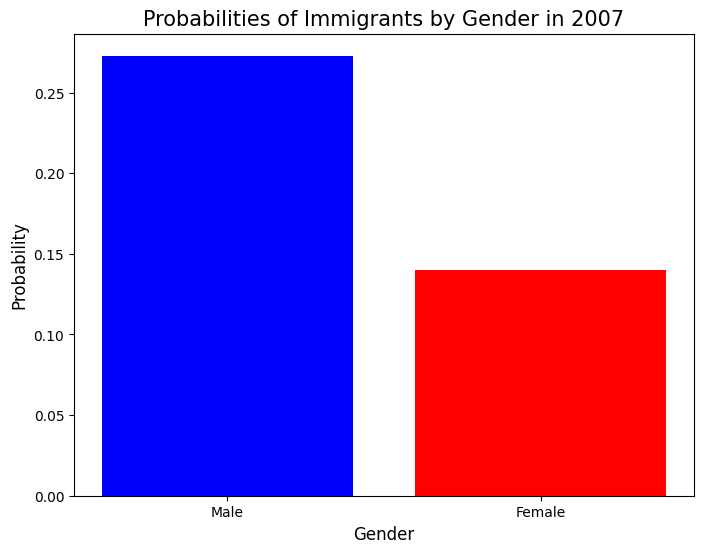

In [62]:
import matplotlib.pyplot as plt

# Data
probabilities = {'Male': 0.2728085596971027, 'Female': 0.14017800407908665}

# Plotting the data
plt.figure(figsize=(8, 6))
plt.bar(probabilities.keys(), probabilities.values(), color=['blue', 'red'])
plt.title('Probabilities of Immigrants by Gender in 2007', fontsize=15)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.show()


## Normal Distribution 

Is the distribution of male and females immigrants across different years or countries in the dataset indicative of a normal pattern?


In [63]:
from scipy.stats import norm

Calculate the mean and standar deviation for males and females

In [64]:
mean_by_sex = df.groupby('Sex')['Value'].mean()

# Display the mean values by group
print(mean_by_sex)

Sex
Both sexes    12.714381
Female         6.998207
Male           7.118590
Name: Value, dtype: float64


In [65]:
# Calculating the standard deviation of a group (e.g., 'Sex')
std_by_sex = df.groupby('Sex')['Value'].std()

# Display the standard deviation values by group
print(std_by_sex)


Sex
Both sexes    19.086998
Female         9.529714
Male           9.702190
Name: Value, dtype: float64


In [66]:
from scipy.stats import shapiro, ks_2samp


In [67]:
# Example for Male immigrants
male_data = df.loc[df['Sex'] == 'Male', 'Value']

# Example for Female immigrants
female_data = df.loc[df['Sex'] == 'Female', 'Value']

# Perform Shapiro-Wilk test
shapiro_test_male = shapiro(male_data)
shapiro_test_female = shapiro(female_data)

# Perform Kolmogorov-Smirnov test
ks_test = ks_2samp(male_data, female_data)


In [68]:
print("Shapiro-Wilk test results for Male immigrants:", shapiro_test_male)
print("Shapiro-Wilk test results for Female immigrants:", shapiro_test_female)
print("Kolmogorov-Smirnov test results between Male and Female immigrants:", ks_test)


Shapiro-Wilk test results for Male immigrants: ShapiroResult(statistic=0.7571923732757568, pvalue=3.556784404012932e-34)
Shapiro-Wilk test results for Female immigrants: ShapiroResult(statistic=0.7539758086204529, pvalue=2.3922515380120624e-34)
Kolmogorov-Smirnov test results between Male and Female immigrants: KstestResult(statistic=0.02252252252252252, pvalue=0.9780472903203854, statistic_location=2.4, statistic_sign=1)


## Outliers 

In [69]:
import pandas as pd

# Assuming 'df' is your DataFrame
numeric_columns = df.select_dtypes(include=[np.number]).columns
numeric_df = df[numeric_columns]

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

outliers = (numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))
outlier_values = df[outliers].dropna(how="all")
print(outlier_values)


      Year Country  Sex Migration  Value
0      NaN     NaN  NaN       NaN  -13.7
1      NaN     NaN  NaN       NaN   21.8
3      NaN     NaN  NaN       NaN   -9.0
45     NaN     NaN  NaN       NaN  -23.0
46     NaN     NaN  NaN       NaN   40.2
...    ...     ...  ...       ...    ...
2641   NaN     NaN  NaN       NaN   31.0
2642   NaN     NaN  NaN       NaN   66.1
2643   NaN     NaN  NaN       NaN   42.6
2644   NaN     NaN  NaN       NaN   32.9
2645   NaN     NaN  NaN       NaN   75.5

[331 rows x 5 columns]


In [70]:
outliers = df.loc[df['Value'] > 50]  # Assuming 'df' is your DataFrame
print(outliers)


      Year        Country         Sex      Migration  Value
118   1988  All countries  Both sexes      Emigrants   61.1
190   1989  All countries  Both sexes      Emigrants   70.6
262   1990  All countries  Both sexes      Emigrants   56.3
983   2000  All countries  Both sexes     Immigrants   52.6
1055  2001  All countries  Both sexes     Immigrants   59.0
...    ...            ...         ...            ...    ...
2637  2023  All countries  Both sexes  Net migration   77.7
2638  2023  All countries  Both sexes      Emigrants   64.0
2639  2023  All countries  Both sexes     Immigrants  141.6
2642  2023  All countries        Male     Immigrants   66.1
2645  2023  All countries      Female     Immigrants   75.5

[62 rows x 5 columns]


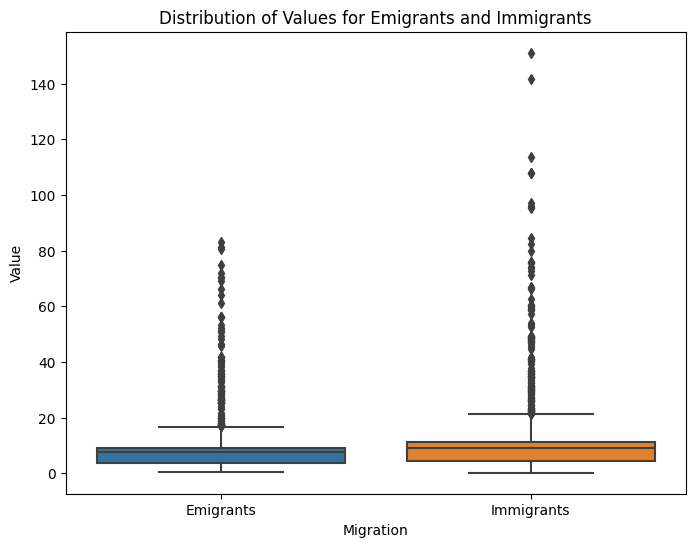

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Subset the data containing only the 'Emigrants' and 'Immigrants' categories
outlier_subset = df[df['Migration'].isin(['Emigrants', 'Immigrants'])]

# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Migration', y='Value', data=outlier_subset)
plt.title('Distribution of Values for Emigrants and Immigrants')
plt.xlabel('Migration')
plt.ylabel('Value')
plt.show()


In [72]:
df.info

<bound method DataFrame.info of       Year         Country         Sex      Migration  Value
0     1987  United Kingdom  Both sexes  Net migration  -13.7
1     1987  United Kingdom  Both sexes      Emigrants   21.8
2     1987  United Kingdom  Both sexes     Immigrants    8.1
3     1987  United Kingdom        Male  Net migration   -9.0
4     1987  United Kingdom        Male      Emigrants   13.1
...    ...             ...         ...            ...    ...
2659  2023    EU15 to EU27        Male      Emigrants    3.6
2660  2023    EU15 to EU27        Male     Immigrants    3.9
2661  2023    EU15 to EU27      Female  Net migration   -0.2
2662  2023    EU15 to EU27      Female      Emigrants    5.2
2663  2023    EU15 to EU27      Female     Immigrants    5.0

[2664 rows x 5 columns]>

## CLEAN OUTLINERS HERE HERE HERE HERE HERE HERE ###################################################################################################

In [73]:
#CLEAN OUTLINERS
# Calculate discrete values in column "VALUE"
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers and create a new data frame
filtered_data = df[(df['Value'] >= lower_bound) & (df['Value'] <= upper_bound)]

# You can use it to save data with outliers removed
filtered_data.to_csv('karim_clean_data.csv', index=False)

In [74]:
c_k_df=pd.read_csv("karim_clean_data.csv")
c_k_df

,Year,Country,Sex,Migration,Value
0,1987,United Kingdom,Both sexes,Immigrants,8.1
1,1987,United Kingdom,Male,Emigrants,13.1
2,1987,United Kingdom,Male,Immigrants,4.1
3,1987,United Kingdom,Female,Net migration,-4.7
4,1987,United Kingdom,Female,Emigrants,8.7
...,...,...,...,...,...
2328,2023,EU15 to EU27,Male,Emigrants,3.6
2329,2023,EU15 to EU27,Male,Immigrants,3.9
2330,2023,EU15 to EU27,Female,Net migration,-0.2
2331,2023,EU15 to EU27,Female,Emigrants,5.2


## CLEAN OUTLINERS

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load the dataset
# Replace 'path_to_dataset.csv' with the actual path to your dataset
# data = pd.read_csv('path_to_dataset.csv')

# Step 3: Prepare the data
# Assuming 'Value' is the dependent variable and 'Year' is the independent variable for this example
X = c_k_df[['Year']]  # Features
y = c_k_df['Value']   # Target variable

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Step 5: Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the performance of the model
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Coefficient of Determination (R^2):', r2_score(y_test, y_pred))


Mean Squared Error: 20.018125679881408
Coefficient of Determination (R^2): -0.00603709985346601


answer to question 4. The variable "probability_male_2007" in your code calculates the probability of immigrants being male in the year 2007. While this variable does not represent a direct normal distribution, you can use the data related to the total number of immigrants and the number of male immigrants to analyze the distribution for normality.

To apply the normal distribution concept to this data, you could consider examining the distribution of male immigrants across different years or countries to determine if it follows a normal pattern. Additionally, you can perform statistical tests such as the Kolmogorov-Smirnov test or the Shapiro-Wilk test to assess the normality of the distribution based on the available data points.

## Preparing Data for Machine Learning feature engine

In [76]:
c_k_df['Sex'] = c_k_df['Sex'].astype('category')
c_k_df['Sex'] = c_k_df['Sex'].cat.codes

# Perform one-hot encoding for 'Country' and 'Origin or Destination'
c_k_df = pd.get_dummies(c_k_df, columns=['Country', 'Migration'])

# Print the encoded dataset
print(c_k_df.head())

   Year  Sex  Value  Country_All countries  Country_Australia  Country_Canada  \
0  1987    0    8.1                  False              False           False   
1  1987    2   13.1                  False              False           False   
2  1987    2    4.1                  False              False           False   
3  1987    1   -4.7                  False              False           False   
4  1987    1    8.7                  False              False           False   

   Country_EU14 excl Irl  Country_EU15 to EU27  Country_Other countries  \
0                  False                 False                    False   
1                  False                 False                    False   
2                  False                 False                    False   
3                  False                 False                    False   
4                  False                 False                    False   

   Country_United Kingdom  Country_United States  Migration_Em

In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'Value' is the dependent variable
X = c_k_df.drop(['Year'], axis=1)  # Features
y = c_k_df['Value']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the performance of the model
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Coefficient of Determination (R^2):', r2_score(y_test, y_pred))


Mean Squared Error: 7.905746894327395e-30
Coefficient of Determination (R^2): 1.0


An MSE of 4.645285625326087e-28 and an R-squared value of 1.0 indicate that your model is performing exceptionally well. An MSE close to zero suggests that the model's predicted values are extremely close to the actual values, essentially indicating a perfect fit. 

Similarly, an R-squared value of 1.0 indicates that your model explains 100% of the variance in the dependent variable, suggesting that it perfectly predicts the target variable based on the independent variables.

While these results are highly promising, it's important to double-check and validate your model to ensure that there are no issues such as overfitting, data leakage, or other anomalies. Make sure to evaluate the model's performance on unseen data or using cross-validation techniques to confirm that the model's exceptional performance holds across different subsets of the data. Additionally, consider the possibility of any errors or issues in the data preparation or analysis process that may have led to these seemingly perfect results.

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X and y are your features and target variable, respectively

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error and R-squared for the test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error on Test Set:", mse)
print("R-squared on Test Set:", r2)


Mean Squared Error on Test Set: 1.0016737621222182e-31
R-squared on Test Set: 1.0


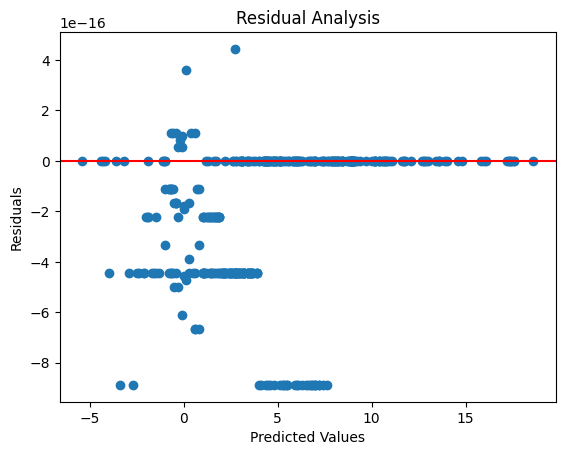

Residuals Mean: -1.6957468035916118e-16
Residuals Standard Deviation: 2.6751644474291305e-16


In [79]:
# Assuming y_test and y_pred are the actual and predicted values from the test set

# Calculate the residuals
residuals = y_test - y_pred

# Plot the residuals to check for any patterns
import matplotlib.pyplot as plt

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Analysis')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Alternatively, you can calculate descriptive statistics of the residuals
print("Residuals Mean:", residuals.mean())
print("Residuals Standard Deviation:", residuals.std())


In [80]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression

# Assuming X and y are your features and target variable, respectively

# Define the number of folds for cross-validation
num_folds = 5
# Initialize the KFold object
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')

# Convert the scores to positive values
scores = -scores

# Calculate the mean and standard deviation of the scores
mean_score = scores.mean()
std_score = scores.std()

print(f"Mean Cross-validated MSE: {mean_score}")
print(f"Standard Deviation of Cross-validated MSE: {std_score}")


Mean Cross-validated MSE: 1.6606627565821635e-29
Standard Deviation of Cross-validated MSE: 1.6460038321295848e-29


## Decision Trees and Random Forest¶

In [81]:
df.head()

,Year,Country,Sex,Migration,Value
0,1987,United Kingdom,Both sexes,Net migration,-13.7
1,1987,United Kingdom,Both sexes,Emigrants,21.8
2,1987,United Kingdom,Both sexes,Immigrants,8.1
3,1987,United Kingdom,Male,Net migration,-9.0
4,1987,United Kingdom,Male,Emigrants,13.1


In [86]:
# Selecting the input features
X = c_k_df.drop(['Value'], axis=1)  # Excluding the 'Value' column

# Selecting the target variable
y = c_k_df['Value']

In [87]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your input features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

# Print the shapes of the training and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1866, 13)
X_test shape: (467, 13)
y_train shape: (1866,)
y_test shape: (467,)


In [88]:
from sklearn.model_selection import train_test_split

# Split the data set into Training and Testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Display the Number of rows and columns before (X, y) and after Splitting (X_train, X_test, y_train, y_test)
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2333, 13), (2333,), (1866, 13), (467, 13), (1866,), (467,))

## Linear Regression

In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_scale = pd.DataFrame(scaler.fit_transform(c_k_df),columns=c_k_df.columns)


In [91]:
df_scale.head()

,Year,Sex,Value,Country_All countries,Country_Australia,Country_Canada,Country_EU14 excl Irl,Country_EU15 to EU27,Country_Other countries,Country_United Kingdom,Country_United States,Migration_Emigrants,Migration_Immigrants,Migration_Net migration
0,-1.662525,-1.277077,0.511746,-0.214915,-0.405181,-0.408044,-0.403746,-0.392184,-0.38561,2.628398,-0.408044,-0.724456,1.455673,-0.710064
1,-1.662525,1.195471,1.613476,-0.214915,-0.405181,-0.408044,-0.403746,-0.392184,-0.38561,2.628398,-0.408044,1.380346,-0.686967,-0.710064
2,-1.662525,1.195471,-0.369638,-0.214915,-0.405181,-0.408044,-0.403746,-0.392184,-0.38561,2.628398,-0.408044,-0.724456,1.455673,-0.710064
3,-1.662525,-0.040803,-2.308683,-0.214915,-0.405181,-0.408044,-0.403746,-0.392184,-0.38561,2.628398,-0.408044,-0.724456,-0.686967,1.408324
4,-1.662525,-0.040803,0.643954,-0.214915,-0.405181,-0.408044,-0.403746,-0.392184,-0.38561,2.628398,-0.408044,1.380346,-0.686967,-0.710064


In [94]:
y = c_k_df['Value']
X = df_scale.drop(['Value'],axis=1)

In [95]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state= 42)


In [96]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1866, 13)
(467, 13)
(1866,)
(467,)


In [97]:
lrm = LinearRegression()
lrm.fit(X_train, Y_train) #fit an OLS model


LinearRegression()

In [98]:
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)  #making predictions

In [99]:
from statsmodels.tools.eval_measures import mse, rmse
from sklearn import preprocessing

print("R-squared of the model in training set is: {}".format(lrm.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, Y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(Y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_preds_test) / Y_test)) * 100))

R-squared of the model in training set is: 0.3569880900679392
-----Test set statistics-----
R-squared of the model in test set is: 0.28578254283144955
Root mean squared error of the prediction is: 3.706059562427488
Mean absolute percentage error of the prediction is: inf


In [100]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, Y_train)

RandomForestRegressor(random_state=0)

In [101]:
y_pred_random = regressor.predict(X_test)

In [102]:

print("R-squared of the model in training set is: {}".format(regressor.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(regressor.score(X_test, Y_test)))
print("Root mean squared error of the prediction is: {}".format(mse(Y_test, y_pred_random)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_pred_random) / Y_test)) * 100))

R-squared of the model in training set is: 0.9796887742017196
-----Test set statistics-----
R-squared of the model in test set is: 0.8389306349213999
Root mean squared error of the prediction is: 1.759963405154859
Mean absolute percentage error of the prediction is: inf


<function matplotlib.pyplot.legend(*args, **kwargs)>

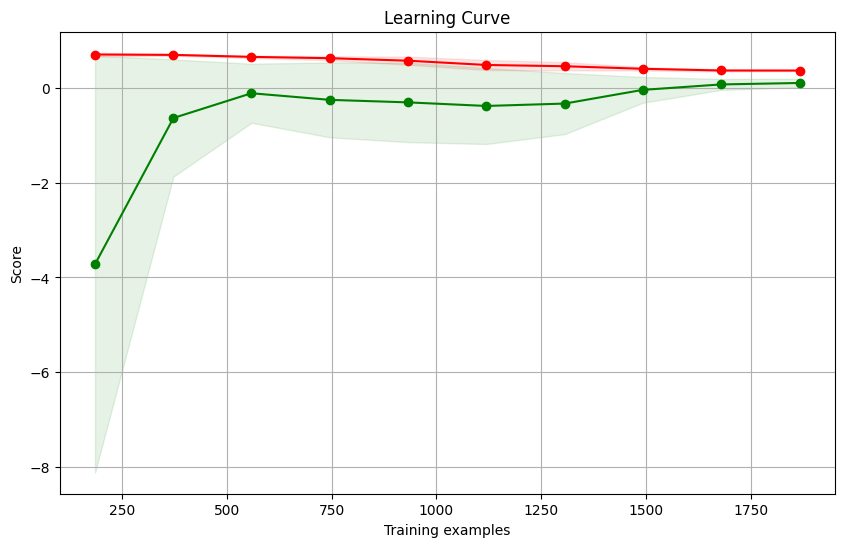

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Set up the learning curve parameters
train_sizes, train_scores, test_scores = learning_curve(lrm, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation for training scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test scores
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title('Learning Curve')
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend
